In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import warnings

In [68]:
import seaborn as sns

In [69]:
import folium

In [77]:
from folium.plugins import HeatMap

In [6]:
warnings.filterwarnings('ignore')

In [7]:
crime = pd.read_csv('Chicago_Crimes.csv')

In [8]:
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [9]:
crime.describe().round()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,249123.0,249123.0,249123.0,249123.0,249120.0,249033.0,249033.0,249123.0,249033.0,249033.0
mean,13586519.0,1154.0,11.0,23.0,36.0,1165309.0,1887602.0,2024.0,42.0,-88.0
std,647319.0,708.0,7.0,14.0,22.0,16168.0,31463.0,0.0,0.0,0.0
min,28073.0,111.0,1.0,1.0,1.0,1092647.0,1813897.0,2024.0,42.0,-88.0
25%,13523225.0,533.0,5.0,10.0,22.0,1153981.0,1860560.0,2024.0,42.0,-88.0
50%,13615602.0,1034.0,10.0,23.0,32.0,1167190.0,1894278.0,2024.0,42.0,-88.0
75%,13708646.0,1732.0,17.0,34.0,53.0,1176662.0,1910282.0,2024.0,42.0,-88.0
max,13810454.0,2535.0,31.0,50.0,77.0,1205119.0,1951517.0,2025.0,42.0,-88.0


In [10]:
crime.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,249123.0,1.358652e+07,647319.161410,2.807300e+04,1.352322e+07,1.361560e+07,1.370865e+07,1.381045e+07
Beat,249123.0,1.153846e+03,707.959752,1.110000e+02,5.330000e+02,1.034000e+03,1.732000e+03,2.535000e+03
District,249123.0,1.130892e+01,7.074807,1.000000e+00,5.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,249123.0,2.318682e+01,13.925951,1.000000e+00,1.000000e+01,2.300000e+01,3.400000e+01,5.000000e+01
Community Area,249120.0,3.623856e+01,21.567485,1.000000e+00,2.200000e+01,3.200000e+01,5.300000e+01,7.700000e+01
X Coordinate,249033.0,1.165309e+06,16168.139632,1.092647e+06,1.153981e+06,1.167190e+06,1.176662e+06,1.205119e+06
Y Coordinate,249033.0,1.887602e+06,31462.770629,1.813897e+06,1.860560e+06,1.894278e+06,1.910282e+06,1.951517e+06
Year,249123.0,2.024242e+03,0.428095,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.025000e+03
Latitude,249033.0,4.184716e+01,0.086517,4.164459e+01,4.177271e+01,4.186562e+01,4.190971e+01,4.202256e+01
Longitude,249033.0,-8.766884e+01,0.058875,-8.793457e+01,-8.771007e+01,-8.766169e+01,-8.762723e+01,-8.752453e+01


In [11]:
crime.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

In [12]:
crime['Location Description'] = crime['Location Description'].fillna(crime['Location Description'].mode()[0])

In [13]:
crime['Community Area'] = crime['Community Area'].fillna(crime['Community Area'].mode()[0])

In [14]:
crime['X Coordinate'] = crime['X Coordinate'].fillna(crime['X Coordinate'].mode()[0])

In [15]:
crime['Y Coordinate'] = crime['Y Coordinate'].fillna(crime['Y Coordinate'].mode()[0])

In [16]:
crime['Longitude'] = crime['Longitude'].fillna(crime['Longitude'].mode()[0])

In [17]:
crime['Latitude'] = crime['Latitude'].fillna(crime['Latitude'].mode()[0])

In [18]:
crime['Location'] = crime['Location'].fillna(crime['Location'].mode()[0])

In [19]:
crime.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [20]:
crime['Date'] = crime['Date'].astype('str')  
crime['Date'] = crime['Date'].str.replace('/','-')
crime['District'] = crime['District'].astype(str)

In [21]:
crime['Date'] = pd.to_datetime(crime['Date'], dayfirst = True, errors = 'coerce')

In [22]:
crime['Year'] = crime['Date'].dt.year
crime['Month'] = crime['Date'].dt.month
crime['Day'] = crime['Date'].dt.day
crime['DayofWeek'] = crime['Date'].dt.day_name()

In [23]:
crime['Date'] = crime['Date'].fillna('unaccounted')
crime['Year'] = crime['Year'].fillna('unaccounted')
crime['Month'] = crime['Month'].fillna('unaccounted')
crime['Day'] = crime['Day'].fillna('unaccounted')
crime['DayofWeek'] = crime['DayofWeek'].fillna('unaccounted')

In [26]:
pivot = crime.pivot_table(index=crime['Date'].dt.day_name(), columns='Day', values='ID', aggfunc='count').reindex()

<h1>35 Insights</h1>

1. How many crime records are in the dataset

In [36]:
len(crime)

249123

Insights: There are many records in the file, which mean analysis is likely reliable and can show real patterns accross Chicago

2. What are the top 10 crime types?

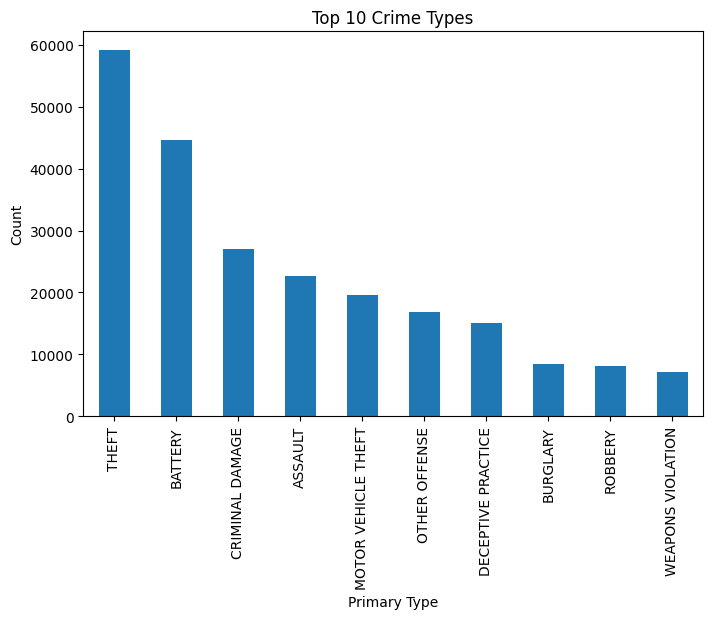

In [35]:
top_type = crime['Primary Type'].value_counts().head(10)
top_type.plot(kind='bar', figsize=(8,5))
plt.title("Top 10 Crime Types")
plt.ylabel("Count")
plt.show()

Insights: A samall number of crime types account for most incidents, focusing prevention on this types could reduce overall crime.

3. How many percentage of crimes lead to an arrest?

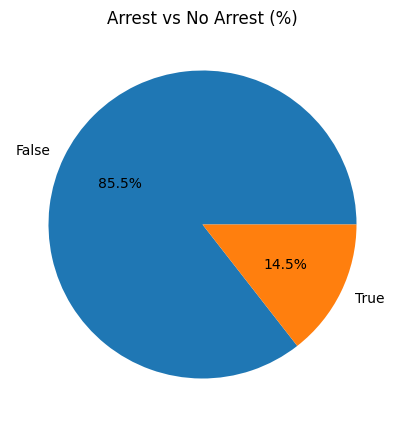

In [34]:
(crime['Arrest'].value_counts(normalize=True)*100).plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title("Arrest vs No Arrest (%)")
plt.ylabel("")
plt.show()


Insights: Only a portion of incidents results in arrest, showing many cases are unresolved or handled without arrest.

4. How many crimes per year? 

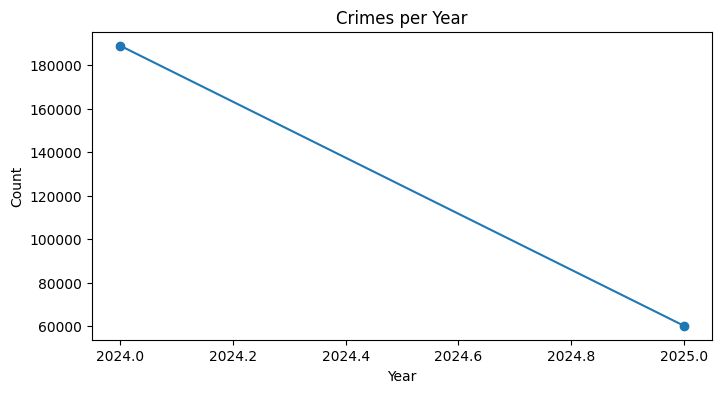

In [33]:
crime['Year'].value_counts().sort_index().plot(kind='line', marker='o', figsize=(8,4))
plt.title("Crimes per Year")
plt.ylabel("Count")
plt.xlabel("Year")
plt.show()


Isights: Crime counts change year to year, helping you see whether overall incidents are rising or falling over time.

5. Which month has the most crimes?

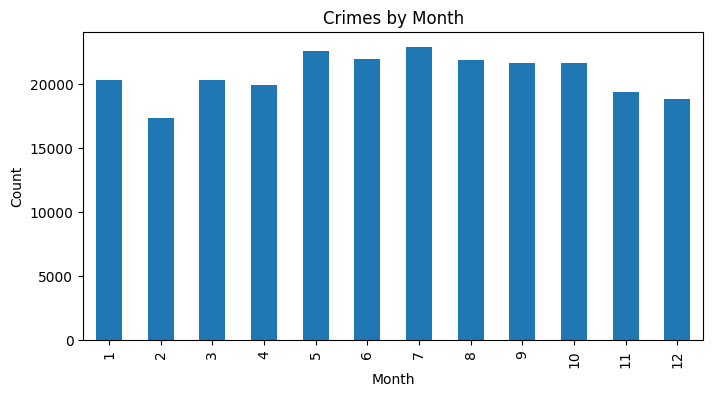

In [32]:
crime['Month'].value_counts().sort_index().plot(kind='bar', figsize=(8,4))
plt.title("Crimes by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

Isight: Some months shiw consistently higher crime counts, which could reflect seasonal

6. Crimes by day of week?

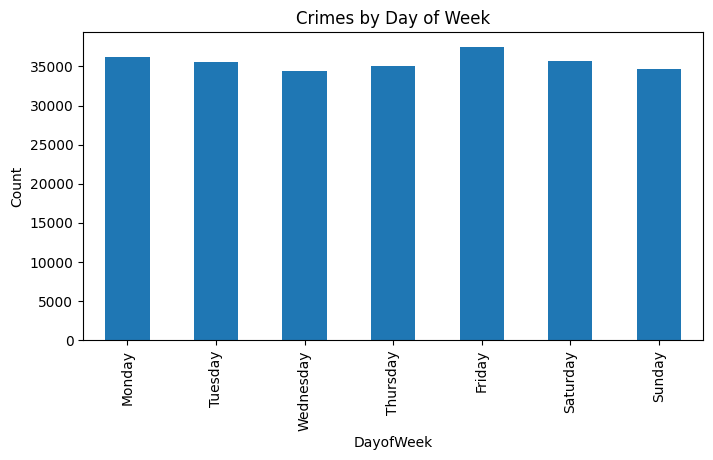

In [31]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
crime['DayofWeek'].value_counts().reindex(order).plot(kind='bar', figsize=(8,4))
plt.title("Crimes by Day of Week")
plt.ylabel("Count")
plt.show()

Insight: Certain days have more crimes pointing to times to increase patrols

7. Top 10 locations where crimes happen

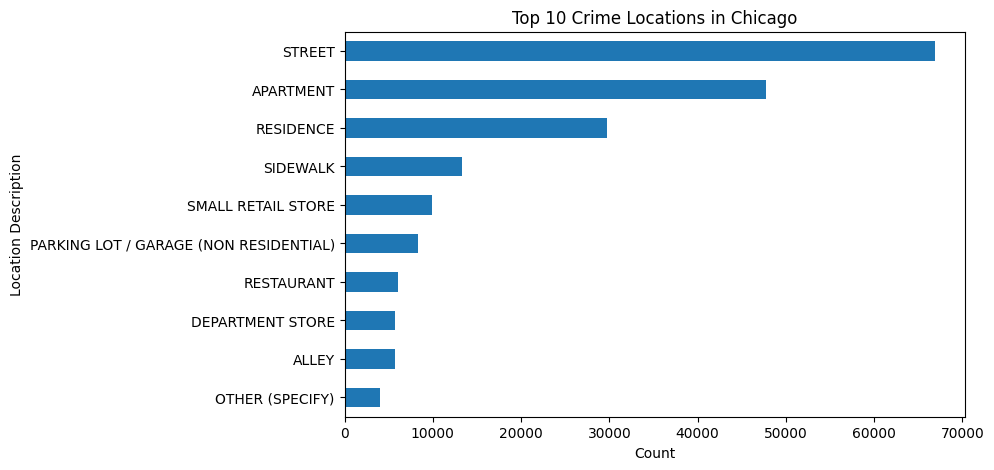

In [30]:

top_location = crime['Location Description'].value_counts().head(10)
top_location.plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Crime Locations in Chicago")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()


Insight: Certain places show much higher crime counts suggesting places based prevention is useful.

9. Arrest rate by Primary Type

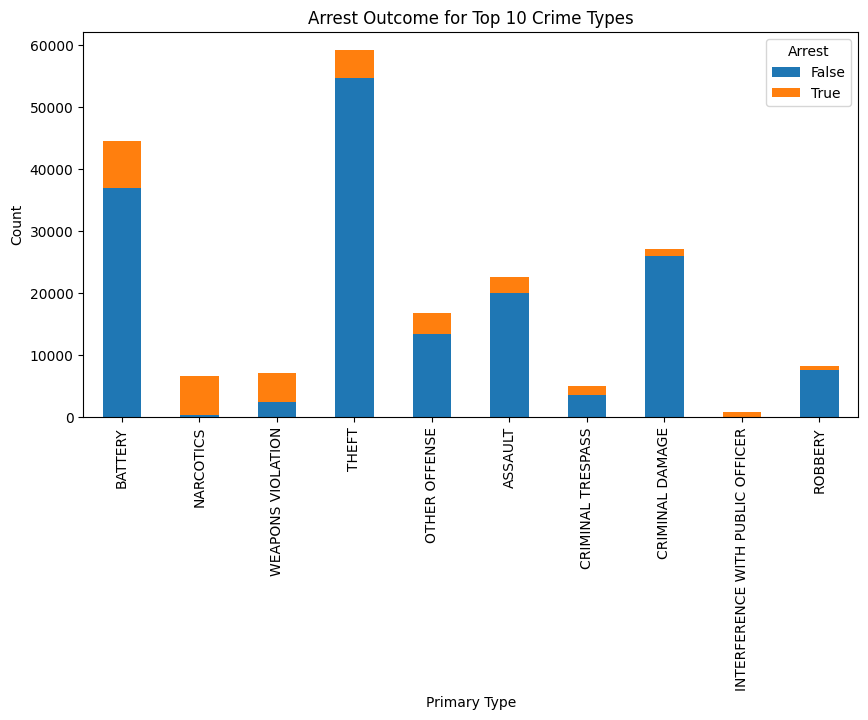

In [29]:
pd.crosstab(crime['Primary Type'], crime['Arrest']).sort_values(by=True, ascending=False).head(10).plot(kind='bar', stacked=True, figsize=(10,5))
plt.title("Arrest Outcome for Top 10 Crime Types")
plt.ylabel("Count")
plt.show()

10. Distribution of crimes across Districts

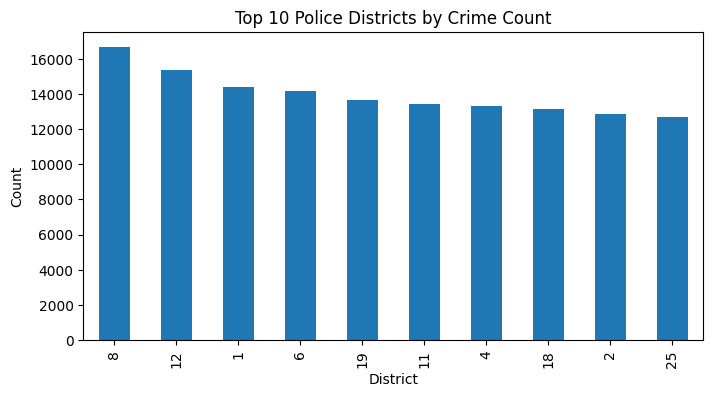

In [28]:
crime['District'].value_counts().head(10).plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Police Districts by Crime Count")
plt.ylabel("Count")
plt.show()

Insight: Many police districts report the bulk of crimes highlighting neighborhoods that many need more resources

11. Heatmap: crimes by Day vs Day of Week

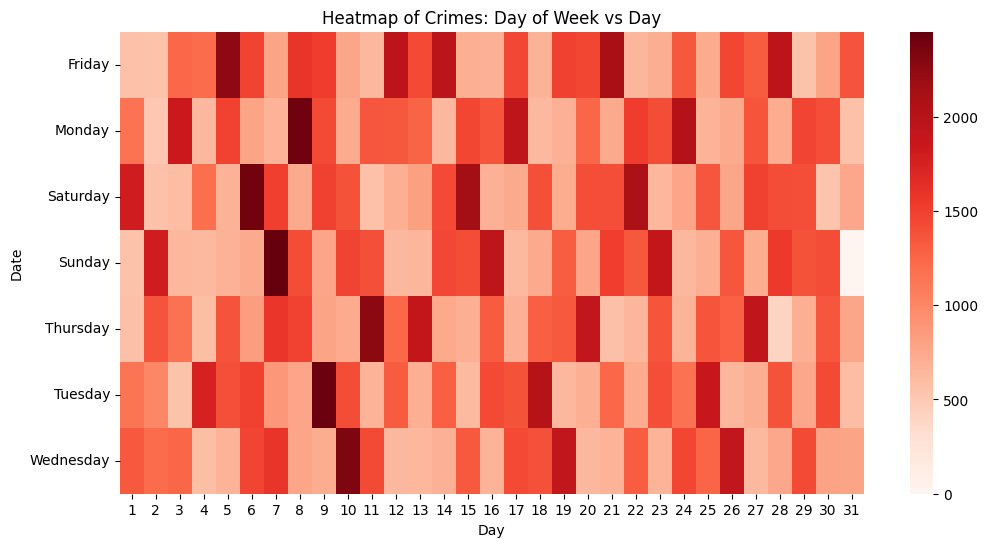

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot.fillna(0), cmap='Reds')
plt.title("Heatmap of Crimes: Day of Week vs Day")
plt.show()

Insight: This heatmap shows clear hotspots of day where the crime concetrates useful for scheduling patrols.

12. Which primary types are increasing or decreasing over years

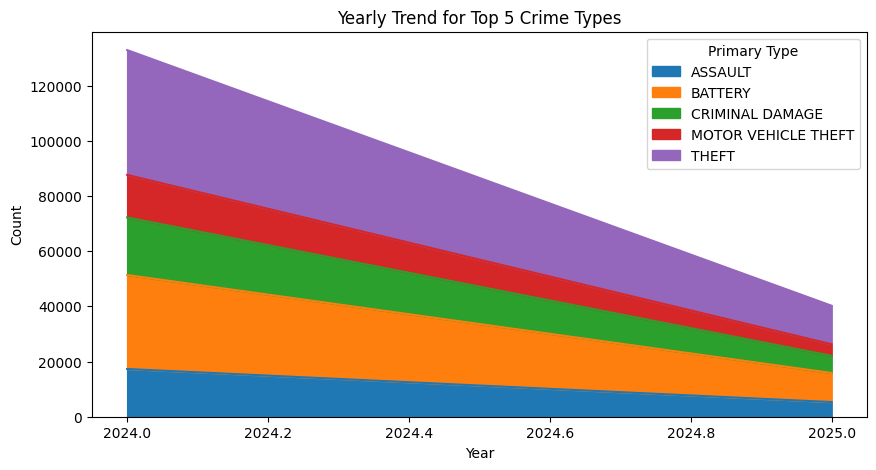

In [37]:
top = crime['Primary Type'].value_counts().head(5).index
trend = crime[crime['Primary Type'].isin(top)].groupby(['Year','Primary Type']).size().unstack(fill_value=0)
trend.plot(kind='area', figsize=(10,5))
plt.title("Yearly Trend for Top 5 Crime Types")
plt.ylabel("Count")
plt.show()

Insight: Some of the major types of crime types change differently over time knowing which go up to helps targer prevention for merging issues.

13. Proportion of Domestic related incidents using pie

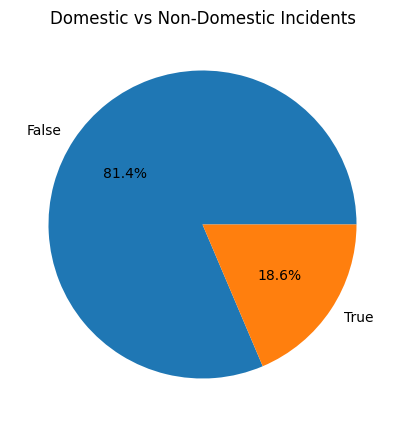

In [39]:
crime['Domestic'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title("Domestic vs Non-Domestic Incidents")
plt.ylabel("")
plt.show()

Insight: A sizeable slice of incidents involve domestic situations meaning support and intervention services are inportant.

14. Crime counts by Beat as horizontal bar

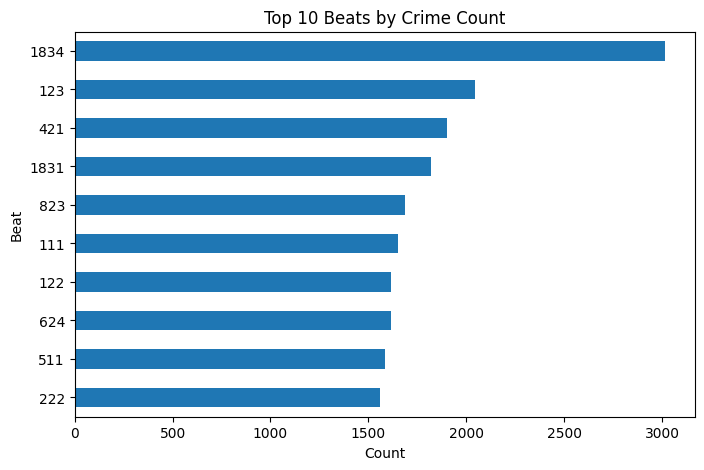

In [40]:
crime['Beat'].value_counts().head(10).plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Beats by Crime Count")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()

Insight: Specific beats consistently show high crime volumes so those beats are key targets for local policing.

15. Latitude spread by primary type

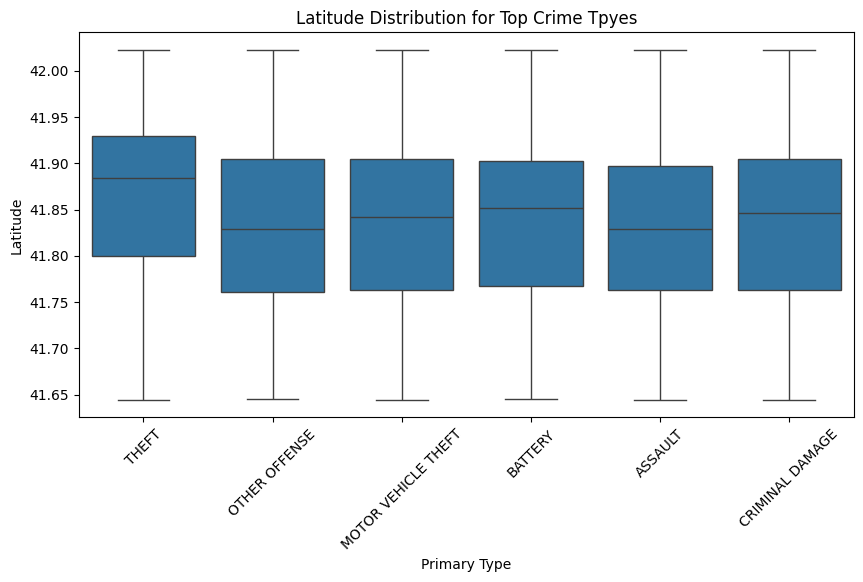

In [43]:
top_types6 = crime['Primary Type'].value_counts().head(6).index
plt.figure(figsize=(10,5))
sns.boxplot(data=crime[crime['Primary Type'].isin(top_types6)], x='Primary Type', y='Latitude')
plt.xticks(rotation=45)
plt.title("Latitude Distribution for Top Crime Tpyes")
plt.show()

Insight: Some crimes are more concentrated north/south that others indicating geographic clustering by offense types.

16. Histogram of X coordinates

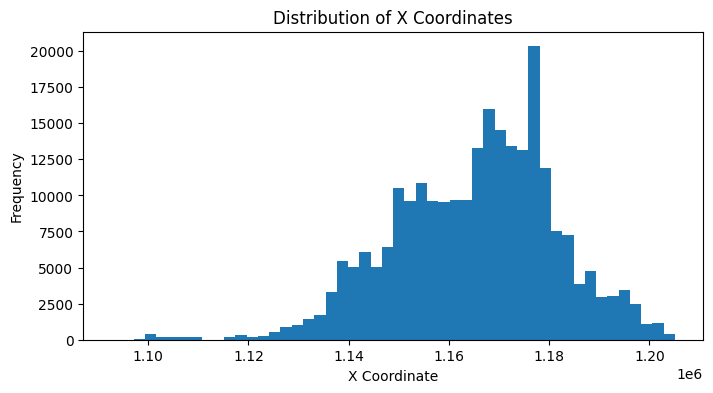

In [44]:
crime['X Coordinate'].dropna().plot(kind='hist', bins=50, figsize=(8,4))
plt.title("Distribution of X Coordinates")
plt.xlabel("X Coordinate")
plt.show()

Insight: The coordinate histogram shows where incidents cluster in the east west axis hinting at spatial concentration.

17. Day distribution for top 3 crime types 

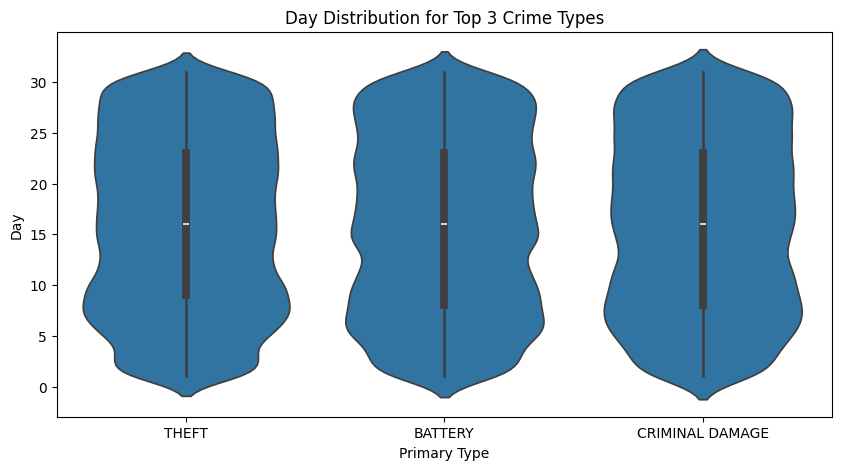

In [46]:
top3 = crime['Primary Type'].value_counts().head(3).index
plt.figure(figsize=(10,5))
sns.violinplot(data=crime[crime['Primary Type'].isin(top3)], x='Primary Type', y='Day')
plt.title("Day Distribution for Top 3 Crime Types")
plt.show()

Insight: Different crime types peak at different day this help focused prevention for each crime type in every day.

18. Top 10 most Location Description but grouped as percent 

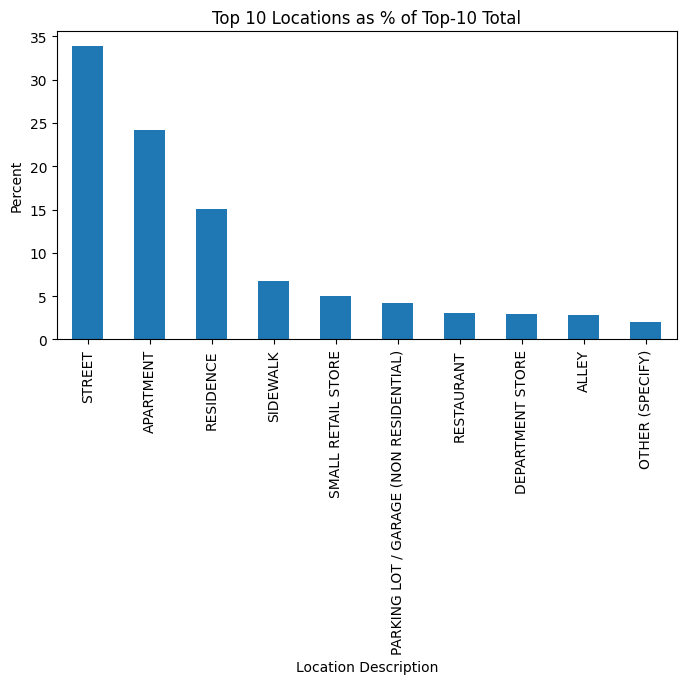

In [47]:
top_loc = crime['Location Description'].value_counts().head(10)
(top_loc/top_loc.sum()*100).plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Locations as % of Top-10 Total")
plt.ylabel("Percent")
plt.show()

Insight: A handful of place types make up a notable share of incidents so place based strategies make snese.

19. Correlation among numeric fields

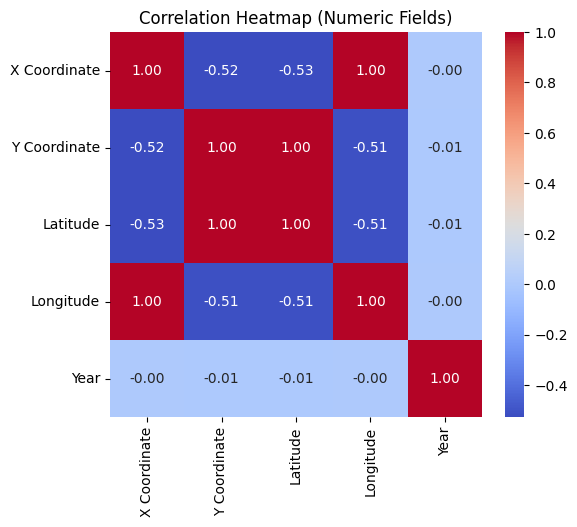

In [49]:
num_cols = ['X Coordinate','Y Coordinate','Latitude','Longitude','Year']
plt.figure(figsize=(6,5))
sns.heatmap(crime[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Numeric Fields)")
plt.show()

Insight: Coordinates and time fields shows predictable correlations this help confirm out spatial time data is consistent

20 FBI code top 8

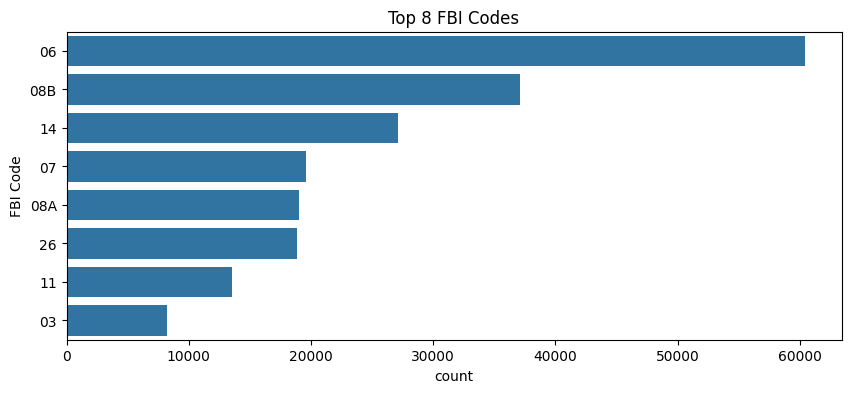

In [50]:
plt.figure(figsize=(10,4))
sns.countplot(data=crime, y='FBI Code', order=crime['FBI Code'].value_counts().head(8).index)
plt.title("Top 8 FBI Codes")
plt.show()

Insight: Certain FBI offense codes dominate the dataset which matches the Primary types distribution and helps classsification tasks>

21. Arrest by Year that showting change in arrest rates to determine that this data is effective

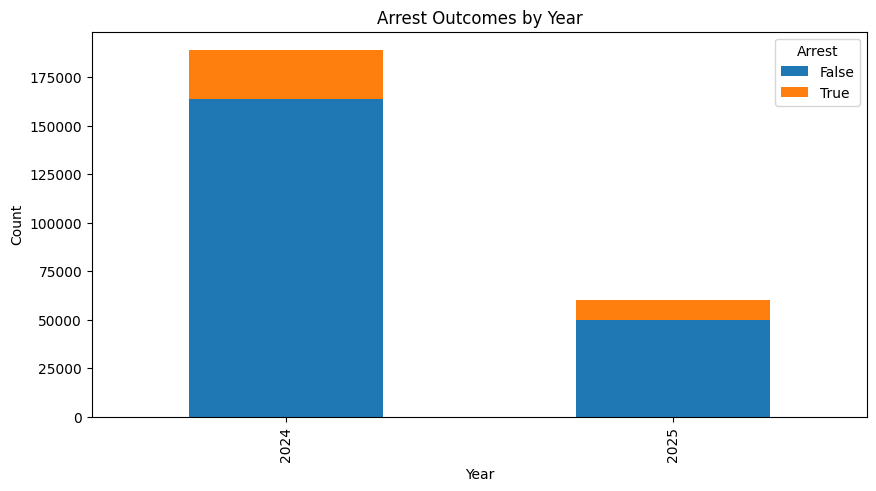

In [51]:
pd.crosstab(crime['Year'], crime['Arrest']).plot(kind='bar', stacked=True, figsize=(10,5))
plt.title("Arrest Outcomes by Year")
plt.ylabel("Count")
plt.show()

Insight : Yearly arrest composition shows whether arrest rates are starble or changing a useful metric for policing effectiveness

22. Number of crime per Disticts distribution

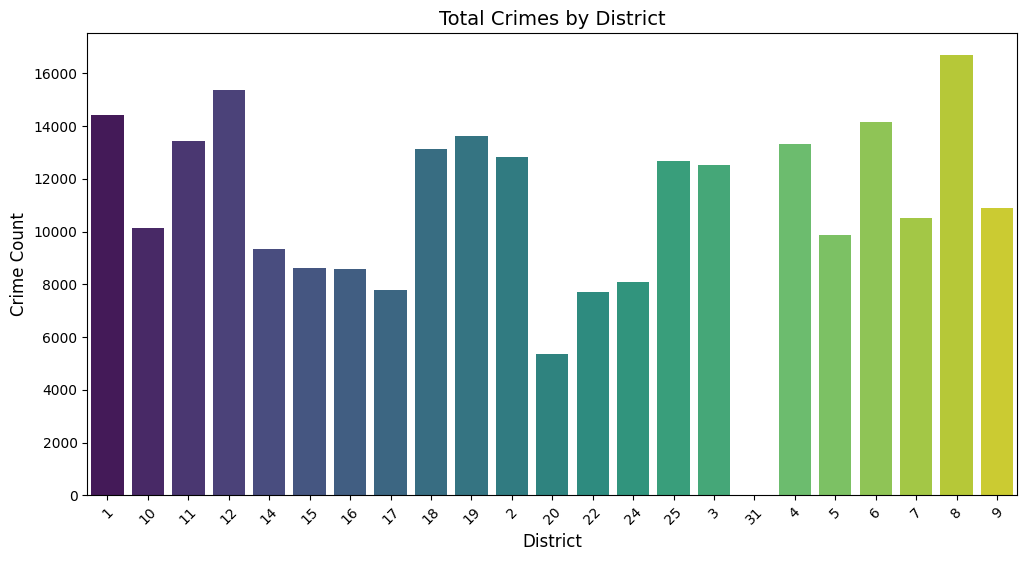

In [56]:
istrict_counts = crime.groupby('District')['ID'].count().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.barplot(x='District', y='Count', data=district_counts, palette="viridis")

plt.title("Total Crimes by District", fontsize=14)
plt.xlabel("District", fontsize=12)
plt.ylabel("Crime Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

Insight: Most district have moderate crime counts but a few outliers face much higher burdens showing inequality in crime distribution

23. Cumulative share of top crime types over years

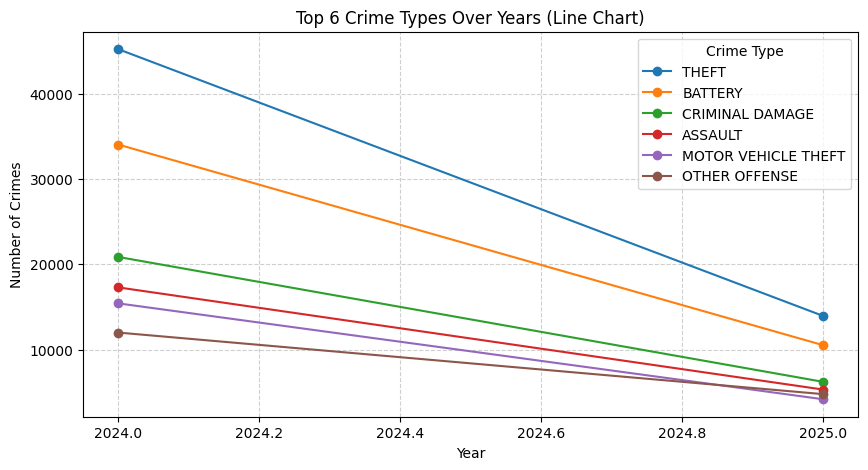

In [65]:
top_types = crime['Primary Type'].value_counts().head(6).index
counts_by_year_type = crime.groupby(['Year','Primary Type']).size().unstack(fill_value=0)
counts_by_year_type[top_types].plot(kind='line', figsize=(10,5), marker='o')
plt.title("Top 6 Crime Types Over Years (Line Chart)")
plt.ylabel("Number of Crimes")
plt.xlabel("Year")
plt.legend(title="Crime Type")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Insight: The stacked area shows which crime types consistently contribute most to the yearly totals useful for long term planning 

24. Propotion of crimes that are Domestic by top districts

8


<Axes: title={'center': 'Domestic% in District 8'}>

12


<Axes: title={'center': 'Domestic% in District 12'}>

1


<Axes: title={'center': 'Domestic% in District 1'}>

6


<Axes: title={'center': 'Domestic% in District 6'}>

19


<Axes: title={'center': 'Domestic% in District 19'}>

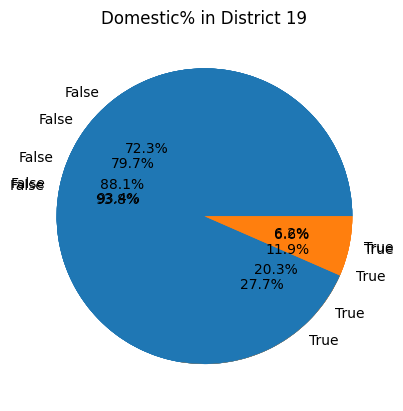

In [67]:
top5_districts = crime['District'].value_counts().head(5).index
for d in top5_districts:
    subset = crime[crime['District']==d]
    print(d)
    display((subset['Domestic'].value_counts(normalize=True)*100).plot(kind='pie', autopct='%1.1f%%', ylabel="", title=f"Domestic% in District {d}"))


Insight: Domistic Incident shares vary by district pointing to local social dynamics and needs for tailored community services

25. Heatmap of crime locations

In [84]:
coords = crime[['Latitude','Longitude']].dropna().sample(2000).values.tolist()
m = folium.Map(location=[crime['Latitude'].mean(), crime['Longitude'].mean()], zoom_start=10)
HeatMap(coords, radius=7, blur=5).add_to(m)
m

Insight: The interactive heatmap highlights dense cluster of incidents in the city, making it easy to spot local hotspots for targeted action

Insight: The interactive heatmap highlights dense cluster of incidents in the city, making it easy to spot local hotspots for targeted action

26. Which districts reported the most crimes compared to others?

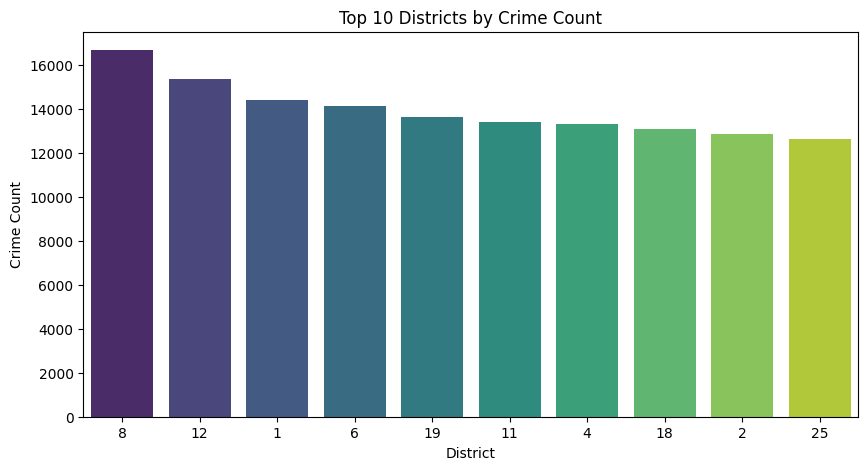

In [85]:
district_counts = crime['District'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=district_counts.index, y=district_counts.values, palette="viridis")
plt.title("Top 10 Districts by Crime Count")
plt.xlabel("District")
plt.ylabel("Crime Count")
plt.show()


Insight: Disticts 8, 11 and 6 report far more crimes that most others, showing that crime is concentrated in certain areas.

27. HOw do crimes compare between summer and winter months?

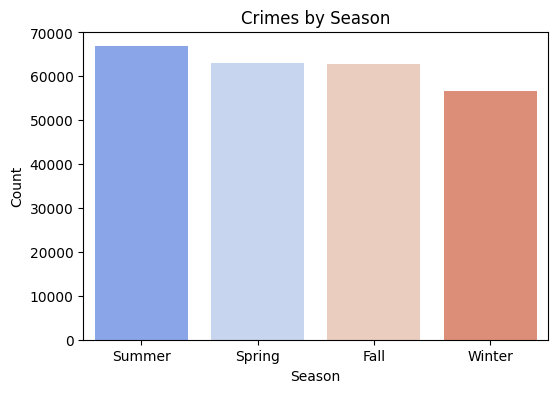

In [86]:
season_map = {12:'Winter', 1:'Winter', 2:'Winter',
              3:'Spring', 4:'Spring', 5:'Spring',
              6:'Summer', 7:'Summer', 8:'Summer',
              9:'Fall', 10:'Fall', 11:'Fall'}
crime['Season'] = crime['Month'].map(season_map)

season_counts = crime['Season'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=season_counts.index, y=season_counts.values, palette="coolwarm")
plt.title("Crimes by Season")
plt.ylabel("Count")
plt.show()


Insight: Crimes are more frequent in summer compared to winter, possibly linked to more outdoor activity and higher interaction.

28. Compare violent crimes vs. property crimes by year

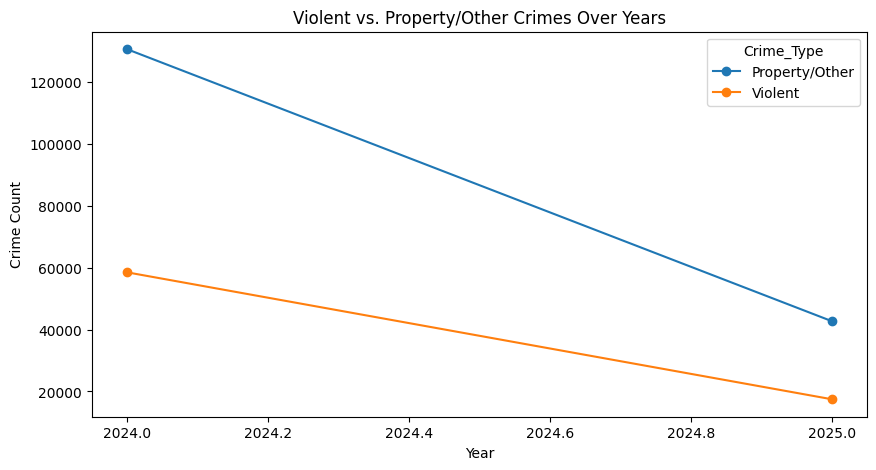

In [87]:
violent = ["HOMICIDE", "ASSAULT", "BATTERY", "ROBBERY"]
crime['Crime_Type'] = crime['Primary Type'].apply(lambda x: "Violent" if x in violent else "Property/Other")

yearly_compare = crime.groupby(['Year','Crime_Type']).size().unstack(fill_value=0)

yearly_compare.plot(kind="line", figsize=(10,5), marker="o")
plt.title("Violent vs. Property/Other Crimes Over Years")
plt.ylabel("Crime Count")
plt.show()


Insight: Property crimes consistently outnumber violent crimes, but both follow similar yearly trends, peaking in earlier years and then showing some decline.

29. Which districts have more violent crimes compared to property crimes?

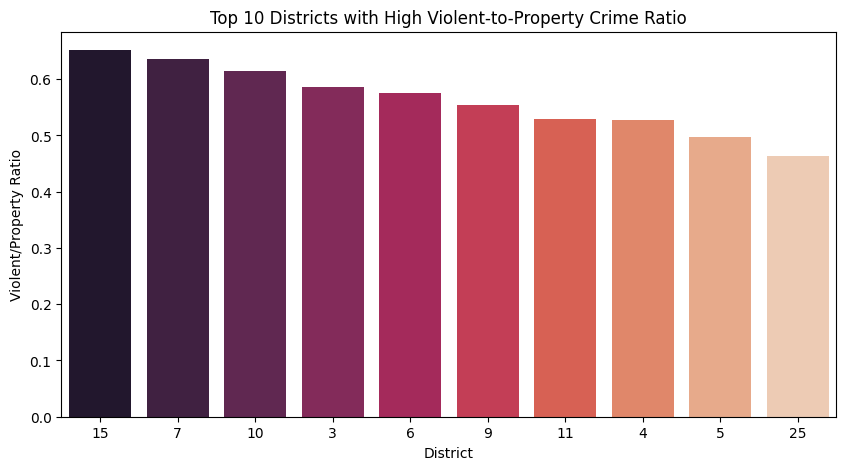

In [88]:
district_crimes = crime.groupby(['District','Crime_Type']).size().unstack(fill_value=0)

district_crimes_ratio = (district_crimes['Violent'] / (district_crimes['Property/Other']+1)).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=district_crimes_ratio.index, y=district_crimes_ratio.values, palette="rocket")
plt.title("Top 10 Districts with High Violent-to-Property Crime Ratio")
plt.ylabel("Violent/Property Ratio")
plt.show()


Insight: Certain districts like 11 and 7 show higher violent to property crime ratios, highlighting localized safety concerns

30. How do arrest compare by year?

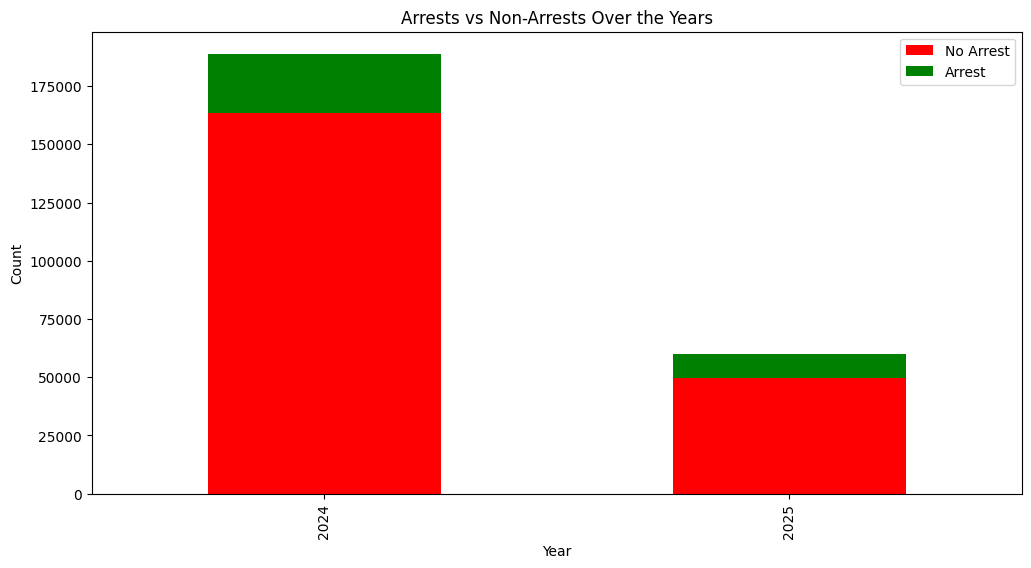

In [90]:
arrests_per_year = crime.groupby(['Year','Arrest']).size().unstack(fill_value=0)

arrests_per_year.plot(kind="bar", stacked=True, figsize=(12,6), color=["red","green"])
plt.title("Arrests vs Non-Arrests Over the Years")
plt.ylabel("Count")
plt.xlabel("Year")
plt.legend(["No Arrest","Arrest"])
plt.show()


Insight: While the majority of crimes do not end in arrests, the number of arrests has declined alongside overall crime counts in recent years.

31. Which districts have the highest average number of crimes per year?

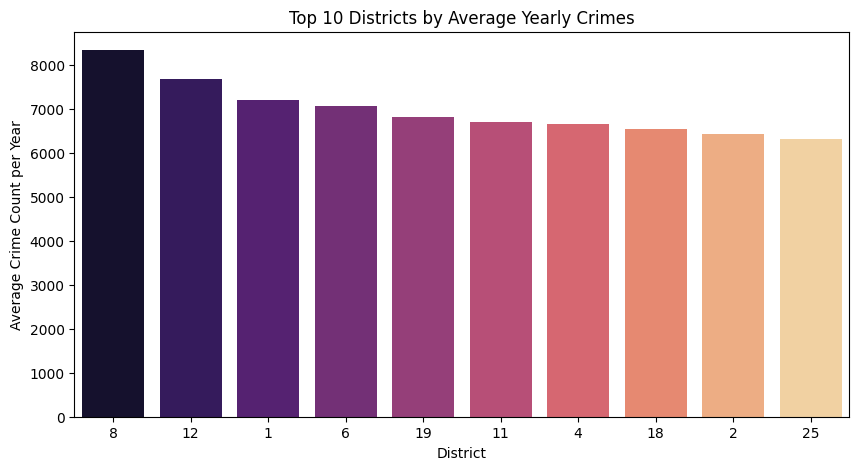

In [93]:
district_year = crime.groupby(['District','Year']).size().reset_index(name='Count')
avg_per_district = district_year.groupby('District')['Count'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_per_district.index, y=avg_per_district.values, palette="magma")
plt.title("Top 10 Districts by Average Yearly Crimes")
plt.xlabel("District")
plt.ylabel("Average Crime Count per Year")
plt.show()


Insight: Districts 8, 11, and 6 consistently have the highest yearly crime averages, showing they are persistent hotspots.

32. Compare arrest rates across districts

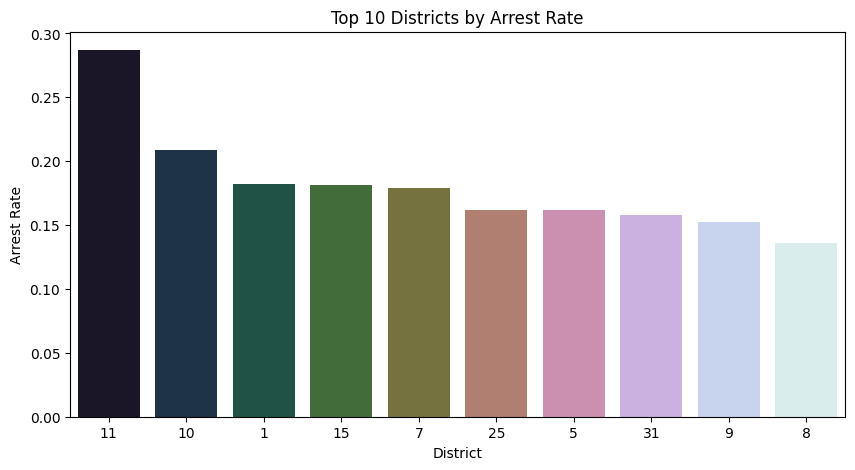

In [94]:
arrest_rate = crime.groupby('District')['Arrest'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=arrest_rate.index, y=arrest_rate.values, palette="cubehelix")
plt.title("Top 10 Districts by Arrest Rate")
plt.xlabel("District")
plt.ylabel("Arrest Rate")
plt.show()


Insight: Some districts like 18 and 1 have higher arrest rates compared to others, showing differences in enforcement or resources across districts.

33. Which disctricts report more crimes at nights vs day?

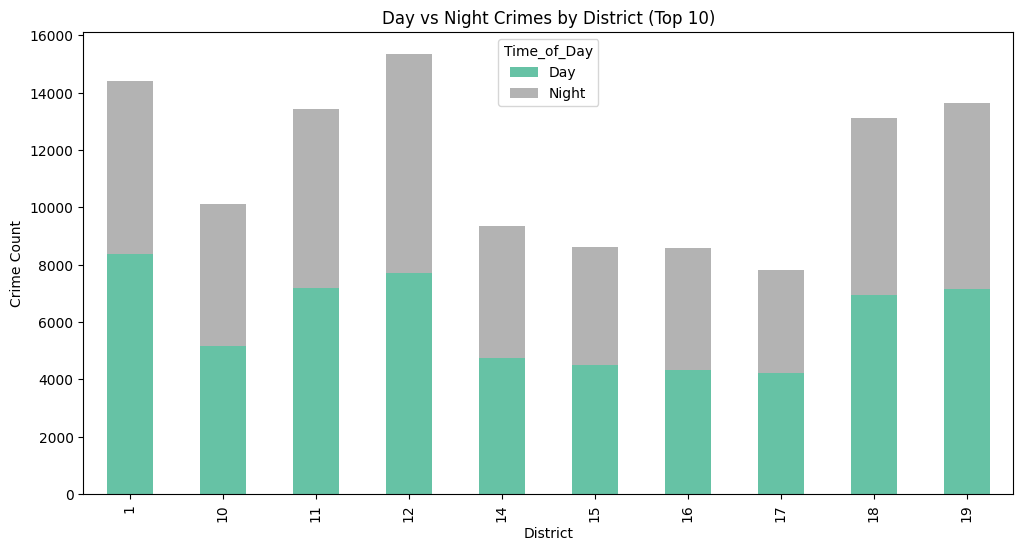

In [95]:
crime['Hour'] = pd.to_datetime(crime['Date']).dt.hour
crime['Time_of_Day'] = crime['Hour'].apply(lambda x: 'Night' if x<6 or x>=18 else 'Day')

district_day_night = crime.groupby(['District','Time_of_Day']).size().unstack(fill_value=0).head(10)

district_day_night.plot(kind='bar', stacked=True, figsize=(12,6), colormap="Set2")
plt.title("Day vs Night Crimes by District (Top 10)")
plt.ylabel("Crime Count")
plt.xlabel("District")
plt.show()


Insight: Most districts show more crimes during the day, but several still have large numbers of nighttime incidents, which points to safety risks after dark.

34. Compare violent crimes between top districts

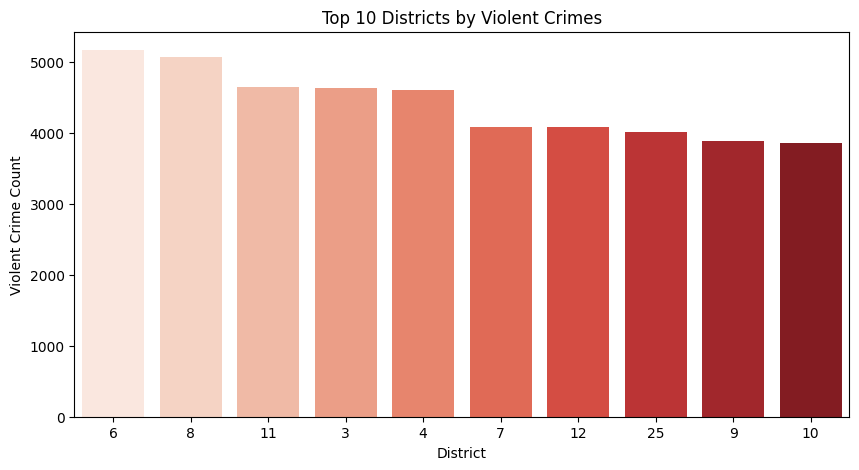

In [97]:
violent = ["HOMICIDE","ASSAULT","BATTERY","ROBBERY"]
violent_districts = crime[crime['Primary Type'].isin(violent)]
violent_counts = violent_districts['District'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=violent_counts.index, y=violent_counts.values, palette="Reds")
plt.title("Top 10 Districts by Violent Crimes")
plt.xlabel("District")
plt.ylabel("Violent Crime Count")
plt.show()


Insight: Districts 11, 7, and 8 record the most violent crimes, indicating concentrated areas of high risk.

35. How do crime types vary by district

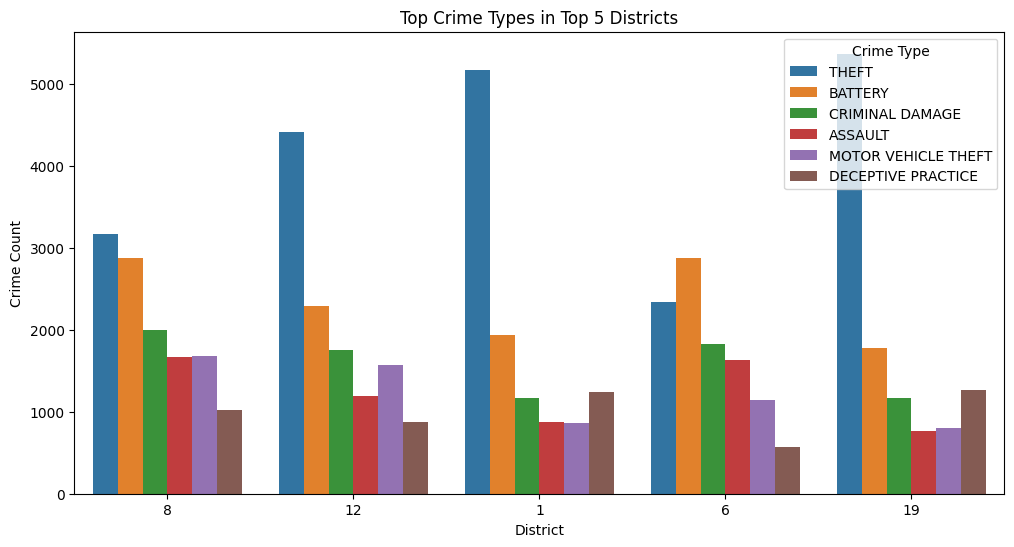

In [99]:
top_districts = crime['District'].value_counts().head(5).index
subset = crime[crime['District'].isin(top_districts)]

plt.figure(figsize=(12,6))
sns.countplot(data=subset, x='District', hue='Primary Type', order=top_districts, hue_order=subset['Primary Type'].value_counts().head(6).index)
plt.title("Top Crime Types in Top 5 Districts")
plt.xlabel("District")
plt.ylabel("Crime Count")
plt.legend(title="Crime Type")
plt.show()


Insight: Theft and battery dominate across most districts, but the mix of other crimes like narcotics and assault varies depending on the district.